#  Google Colab を用いた fastai による深層学習

Copyright Mikio Kubo@LOGOPT

深層学習 (deep learning) は民主化が進んでおり，様々なオープンソースのパッケージが開発されている．

たとえば tensorflow, Keras, PyTorch, Chainerなどが有名であるが，ここではfastaiを用いる．

fastaiは、最先端の深層学習を実務家が気軽に適用できるようにするためのパッケージである．

開発者が「AIをもう一度uncoolに」を標語にしているように，専門家でなくても（Pythonを知っていれば）ある程度（というか数年前の世界新記録程度）の深層学習を使うことができる．

特徴は以下の通り。

- コードが短くかける（Kerasよりも短い）。
- 速い。
- 最新の工夫が取り入れられている。
- PyTorchの足りない部分を補完してくれる。
- 無料の（広告なしの） 講義ビデオがある．

fastaiについては，https://www.fast.ai/ 参照．

## 簡単な定義

- 人工知能: 機械に知能を持たせるための技術．
- 機械学習：（教師ありに限定だが）入力データと出力データから，モデルのパラメータを調整する方法．
- ニューラルネット：単なる関数近似器．ニューラルネットを体験 https://playground.tensorflow.org/
- 深層学習：単なる多次元分散型関数近似器．
- fast.ai：PyTorchのラッパー

まずはインストールを行う．

1. 上部メニューのランタイム/ランタイプの種類を変更でGPUをオンにする．
2. fastaiをpipで入れる．

In [3]:
!pip3 install fastai
# fast.ai が準備した以下のコマンドでも良いが時間がかかる．
# 注意：Google Colabの環境が変わる可能性がある．
# !curl https://course-v3.fast.ai/setup/colab | bash

 fastaiのユーティリティにある show_install関数でインストールの状態を確認しておく．
また，check_perf()関数で，環境の改善点を示唆してもらっておく．

In [4]:
from fastai.utils.collect_env import *
show_install()
#check_perf()



```text
=== Software === 
python        : 3.6.9
fastai        : 1.0.61
fastprogress  : 0.2.3
torch         : 1.5.0+cu101
nvidia driver : 418.67
torch cuda    : 10.1 / is available
torch cudnn   : 7603 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Wed Feb 19 05:26:34 PST 2020
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run

# データを用いた学習（訓練）のコツ

まずは必要なモジュールをインポートする．


In [0]:
from fastai import *
from fastai.vision import *

## MNIST_SIMPLE の訓練

深層学習の"Hello World"に相当するMNISTの小規模サンプル（３と７だけのデータ）を用いて，訓練のコツを伝授する．

MNIST_SIMPLE のデータを読み込む．

In [0]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)

In [0]:
path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None

### **data**はデータ束 (DataBunch)のインスタンス

- PyTorchのデータセット = 独立変数のデータ，従属変数のデータ

fastaiのDataBunch（データ束）インスタンスを訓練データセットと検証データセットとバッチサイズから生成する．

- fastaiのデータ束 =訓練データセット, 検証データセット, バッチサイズ 

これによって，データをバッチごとに生成することができる．

読み込んだデータの1バッチ分は show_batchメソッドでみることができる．引数のfigsizeで大きさを調整する．

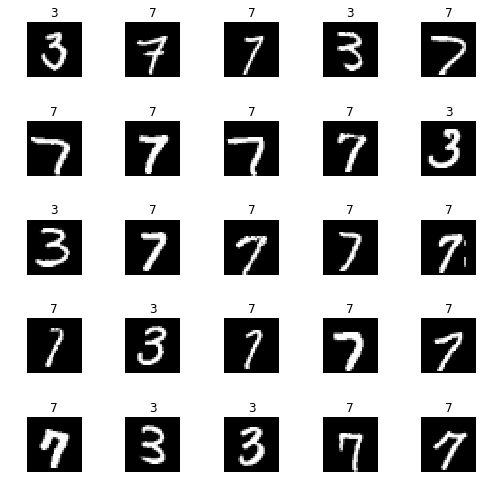

In [0]:
data.show_batch(figsize=(7,7))

単純なcnn（畳み込みニューラルネット）モデル modelのインスタンスを生成し，データとあわせて学習器 learn を生成する．メトリクスは正解率(accuracy)を指定しておく

In [0]:
model = simple_cnn((3,16,16,2))
learn = Learner(data,model,metrics=[accuracy])

In [0]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
  )
  (1): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
  )
  (2): Sequential(
    (0): Conv2d(16, 2, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
  )
  (3): Sequential(
    (0): AdaptiveAvgPool2d(output_size=1)
    (1): Flatten()
  )
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, be

深層学習で最も重要なパラメータは，学習率(learning rate: lrと略される）である．深層学習では，重み（パラメータ）調整のために非線形最適化を行う．

つまり，勾配に適当なステップサイズを乗じて現在の値から減じる操作を繰り返す．この非線形最適化におけるステップサイズのことを，学習率と呼んでいる．

これをチューニングするために，fastaiでは学習器オブジェクト にlr_find() というメソッドを準備している．

学習器learnを作成してlearn.lr_find() をした後に，learn.recorder.plot()とする

In [0]:
learn.lr_find() 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


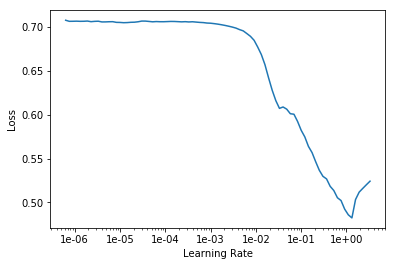

In [0]:
learn.recorder.plot()

これは学習率を小さな値から1反復ごとに2倍にしたときの損出関数（目的関数のこと）をプロットしたものだ．実際の反復ごとの学習率は，learn.recorder.plot_lr()で見ることができる．

損出関数が最小になるのは，学習率が1e+0 あたりだが，最も大きな谷の下り坂に入るあたりが良いとされている．ここでは，学習率を1e-2(0.01)に設定して訓練してみる．

これには学習器インスタンスのfitメソッドを用いる．引数はエポック数（最適化の反復回数；データ全体を何回使うかを表す）と学習率である．

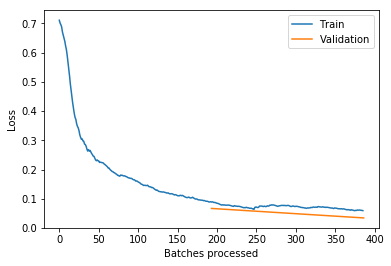

In [0]:
learn.fit(2,0.01)
learn.recorder.plot_losses()

学習率と慣性項を変化させながら訓練を行う fit_one_cycleを用いてみよう．これを使うと収束が速くなると言われている．

引数はエポック数と最大学習率 max_lr である．

In [0]:
learn.fit_one_cycle(3,max_lr=1e-2)

この方法では，学習率を小さな値から最大学習率まで増やし，その後徐々に減少させていく．同時に，慣性項を徐々に下げて，その後増加させていく．

実際にどのように変化させているかは，recorder.plot_lrで確認することができる．

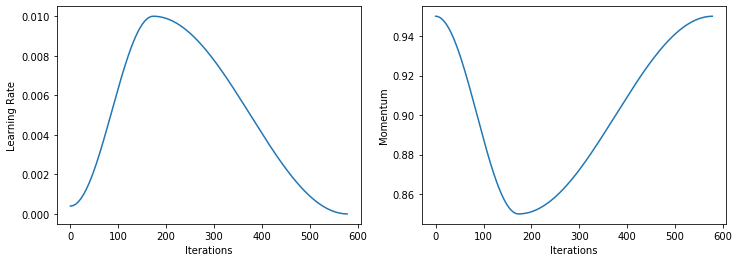

In [0]:
learn.recorder.plot_lr(show_moms=True)

正解率(accuracy)は99%まで改善された．損出関数の変化をプロットしてみよう．

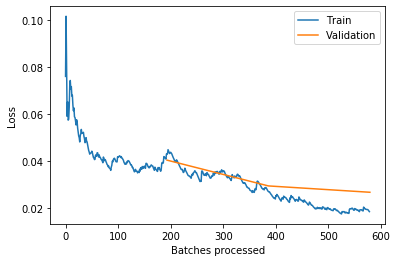

In [0]:
learn.recorder.plot_losses()

損出関数の値と予測値を得るには，get_predsメソッドを用いる．

元のデータと予測値，正解（y），損出関数の値を引数として， ClassificationInterpretation()クラスのインスタンスを生成する．

plot_top_lossesを用いると，損出関数が悪かったデータを描画してくれる．

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

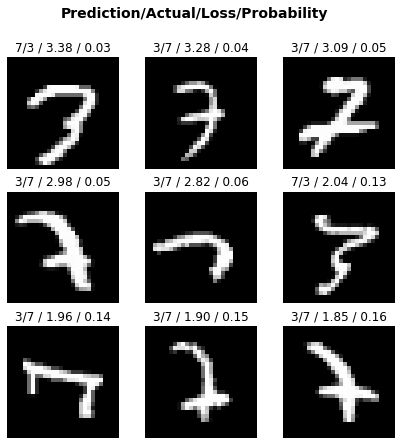

In [0]:
interp.plot_top_losses(9, figsize=(7,7))

In [0]:
interp.most_confused()

[('7', '3', 16), ('3', '7', 7)]

正解と外れを表す表（混合行列とよばれる）を出力するには，plot_confusion_matrixを使う．

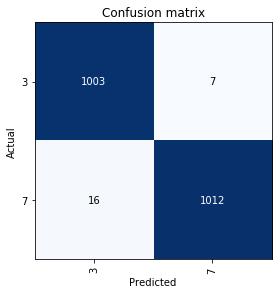

In [0]:
interp.plot_confusion_matrix()

単純cnnでなく，resnetを使ってみよう．これは残差ネットワークとよばれ， learn.summaryをみると，大規模な畳み込みニューラルネットであることが分かる．学習済みの重みが読み込まれ，この重みをもとに転移学習を行う．

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 28.3MB/s]


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


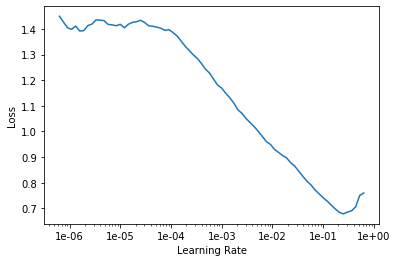

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1,max_lr=1e-2)

unfreezeメソッドによって，resnetの学習済みの重み層を，自由に変更できるようにし，fit_one_cycleですべての層の重みを訓練してみる．学習率は，最初の方の層では，最終層と比べて小さめに設定しておくと良い．
ここでは最初の層を1e-5，最後の層を1e-3と設定する．また，過剰適合(overfit)を避けるため，重み減衰wdを大きめに設定しておく．

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3,max_lr=slice(1e-5,1e-3),wd=0.4 )

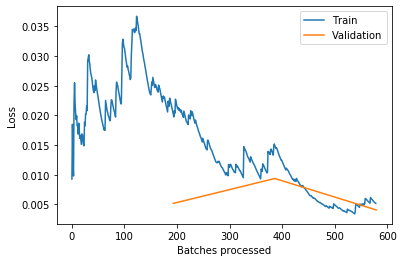

In [0]:
learn.recorder.plot_losses()

損出関数の値が悪かった9つのデータを表示して，混合行列を出力する．

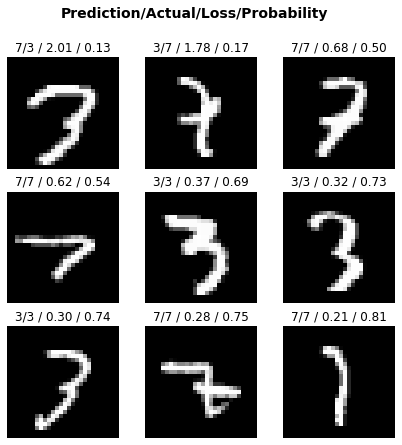

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

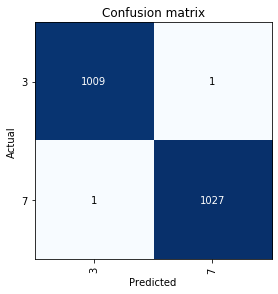

In [0]:
interp.plot_confusion_matrix()

## ダウンロードデータの訓練

自分の好きなデータを Google Imageからダウンロードして訓練してみよう．

download_google_imageは，widgetの中にあるのでインポートしておく．

labelsリストに検索したい好きなキーワードを入れると，Google Imageから画像をダウンロードする．事前にGoogle Imageでちゃんと画像が見られるか確認しておくと良い．

In [0]:
from fastai.widgets import *

以下のダウンローダーは，検索したいイメージ名とダウンロードしたい数(100が推奨)と画像サイズを指定してダウンロードする．左のファイルの**image**フォルダに検索した名前のサブフォルダができて，その中にファイルがある．

たまにイメージが検索できずにエラーする．その場合には，根気よく繰り返す．

In [0]:
import os
path ="image"
os.makedirs(path, exist_ok=True)
ImageDownloader(path)

In [0]:
# 以下のように，複数のラベルを指定して，一度にダウンロードもできる．
# ファイルの数の上限は100
# 途中でダウンロードエラーする場合もあるので，注意．
#path = 'image'
#labels =["Rx78 GUndam","Zaku"] #ここに自分の好きなキーワードを入れる！
#for label in labels: 
#    download_google_images(path, label, size='>400*300', n_images=50)

ダウンロード後にランライムが切断されることがある．その場合には，以下を実行．

In [0]:
from fastai import *
from fastai.vision import *

ファイルからデータを生成し，1バッチ分を表示する．

ここや，以下の訓練中にエラーが出た場合には，画像ファイルが壊れている可能性がある．エラーしたファイル名を見て，左側のファイルから画像を選択し，右クリックで削除してから，再実行する．

これを動くまで繰り返す．

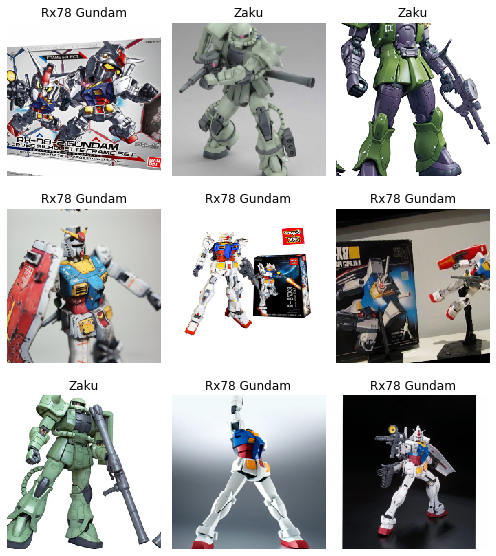

In [0]:
path = Path(path)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(10)

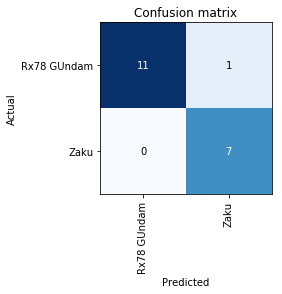

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

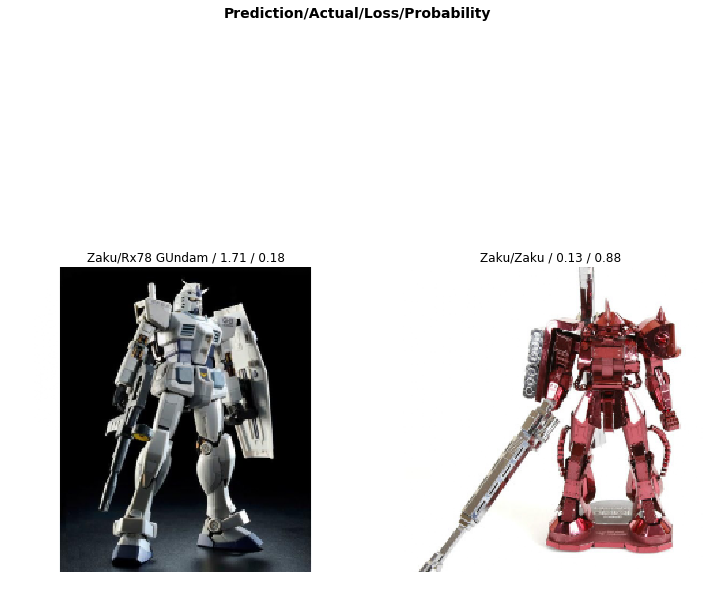

In [0]:
interp.plot_top_losses(2, figsize=(12,12))

## ＭＮＩＳＴ の訓練

0-9の数字の画像ファイルから，数字を当てる．

ファイルをダウンロードしたて展開したときのフォルダ名が間違えてるのでリネームする．

In [0]:
path = untar_data(URLs.MNIST)

In [0]:
!mv {path}/testing {path}/valid
!mv {path}/training {path}/train
!ls {path}

train  valid


In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms)
data.normalize()

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
2,2,2,2,2
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
2,2,2,2,2
Path: /root/.fastai/data/mnist_png;

Test: None

In [0]:
learn = Learner(data, models.Darknet(num_blocks=[1,2,8,8,4],num_classes=10),metrics=accuracy).to_fp16()
learn.fit_one_cycle(10, wd=0.4)

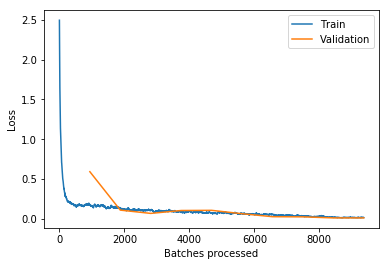

In [0]:
learn.recorder.plot_losses()

## Cifar10の訓練

Cifar10は粗い画像から，10種類の物体を当てる問題である．

データを読み込んだ後に，get_ransform()でデータ増大(data augmentation)を行うためのオブジェクトtfms を生成する．

画像データ束クラス ImageDatabunch のfrom_forder()メソッドでデータを生成するが，
その際に引数df_tfmsにtfmsを渡して訓練時に画像を多少変えて行うように設定する．

最後に，データ束をnormalize()メソッドで正規化して，表示する．

In [0]:
path = untar_data(URLs.CIFAR)

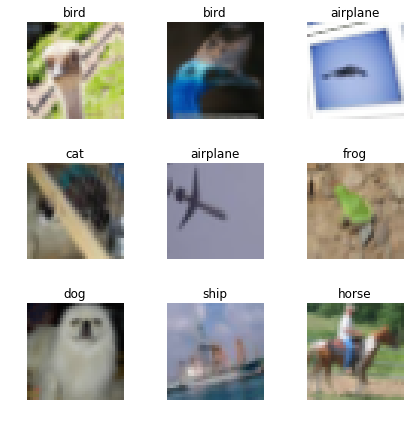

In [0]:
tfms = get_transforms()
#tfms = ([pad(padding=4), crop(size=32, row_pct=(0,1), col_pct=(0,1)), flip_lr(p=0.5)], [])
data = ImageDataBunch.from_folder(path, valid='test',ds_tfms=tfms)
#data.normalize()
data.normalize(cifar_stats)
data.show_batch(rows=3, figsize=(6,6))

データとアーキテクチャ（モデル：今回はワイド残差ネットワーク）をあわせて学習器を生成する．

メトリクスは正解率(accuracy)とする．

また，to_fp16()メソッドで混合精度（floating point を32ビットでなく16ビットで計算する)
ようにする．

訓練はfit_one_cycleを用いる．エポック数は30とし，過剰適合を避けるために，重み減衰のパラメータwdは0.3と大きめに設定する．

In [0]:
learn = Learner(data, models.wrn_22(), metrics=accuracy).to_fp16()
learn.fit_one_cycle(30, wd=0.3)

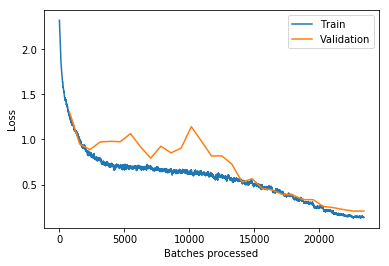

In [0]:
learn.recorder.plot_losses()

混合行列を出力する．

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

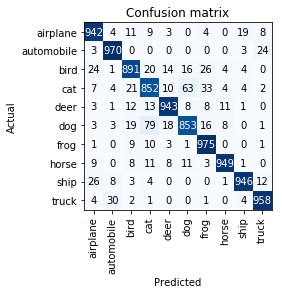

In [0]:
interp.plot_confusion_matrix()

## PETSの訓練

37種類のPETの種類を判別する．

データの読み込みには正規表現を用いる．

モデル（アーキテキクチャ）は画像ファイルなのでRESNETを用いる．

In [0]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/"annotations"
path_img = path/"images"

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_227.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_93.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_223.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_131.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_21.jpg')]

上のファイル名から，"Russian_Blue"などのクラス名だけを抽出するための正規表現を準備する．

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

ImageDataBunchクラスのfrom_name_re()メソッドは，正規表現を用いてデータを生成する．
引数は順に，
* 画像ファイルの置き場所
* ファイル名のリスト
* クラス名をファイル名から抽出するための正規表現
* データ増大のための関数
* 画像ファイルのサイズ
である．

その後で，imagenet_stats（イメージネットの統計量）をもとに正規化する．

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,english_cocker_spaniel,Egyptian_Mau,pomeranian,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,english_setter,miniature_pinscher,miniature_pinscher,Birman
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

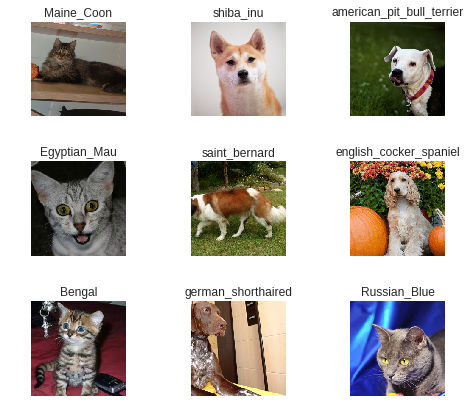

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 89114317.92it/s]


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-03


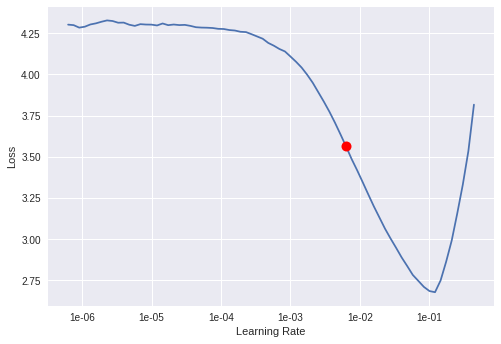

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4,1e-2)

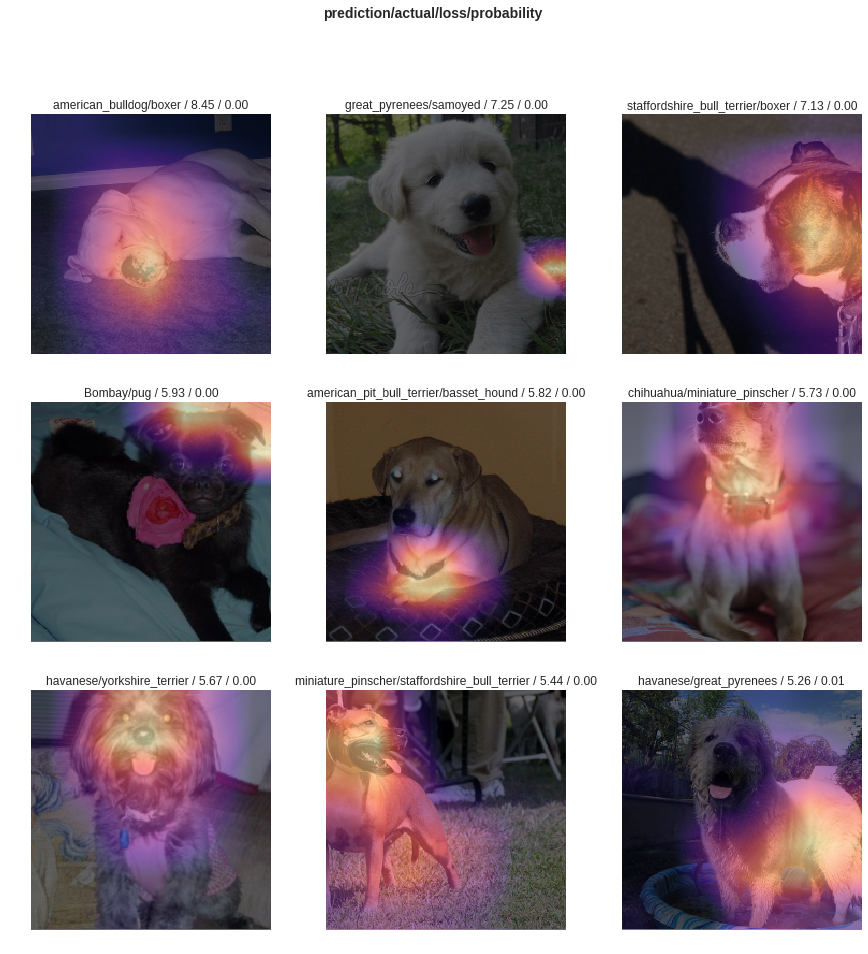

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(15,15), heatmap=True)

In [0]:
interp.confusion_matrix()

array([[33,  2,  0,  0, ...,  0,  0,  0,  0],
       [ 1, 34,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0, 42,  0, ...,  0,  0,  0,  0],
       [ 0,  1,  0, 32, ...,  0,  0,  0,  0],
       ...,
       [ 0,  0,  0,  0, ..., 31,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0, 40,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0, 24,  0],
       [ 0,  0,  0,  0, ...,  0,  0,  0, 45]])

In [0]:
interp.most_confused(5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6)]

## DOGS & CATの訓練

画像ファイルから犬か猫からを判別する．

使用するモデル（アーキテキクチャ）はRESNET34

In [0]:
# dogs and cats example code 
path = untar_data(URLs.DOGS)

data = ImageDataBunch.from_folder(
    path, 
    ds_tfms=get_transforms(), 
    size=224
 )


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy]).to_fp16()
learn.fit(1)

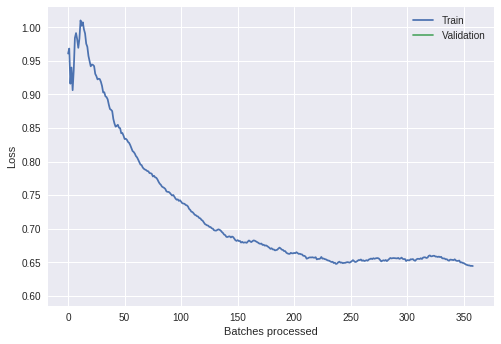

In [0]:
learn.recorder.plot_losses()

# 表形式データの学習


In [0]:
from fastai import *

In [0]:
from fastai.tabular import * 

ADULT_SAMPLEは，小規模な表形式データであり，$50k以上の収入があるかどうかを当てるのが目的だ．

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/export.pkl'),
 PosixPath('/root/.fastai/data/adult_sample/adult.csv'),
 PosixPath('/root/.fastai/data/adult_sample/models')]

In [96]:
df = pd.read_csv(path/'adult.csv')
df.head()

age          workclass  fnlwgt  ... hours-per-week  native-country salary
0   49            Private  101320  ...             40   United-States  >=50k
1   44            Private  236746  ...             45   United-States  >=50k
2   38            Private   96185  ...             32   United-States   <50k
3   38       Self-emp-inc  112847  ...             40   United-States  >=50k
4   42   Self-emp-not-inc   82297  ...             50   United-States   <50k

[5 rows x 15 columns]

In [97]:
len(df)

32561

表形式データの基本クラスは TabularDataBunch であり，これはfrom_dfメソッドを用いてpandasのデータフレームから作ることができる．

主な引数の意味は以下の通り．

- path：ファイルの置き場所
- df: データフレーム
- dep_var: 従属変数の列名
- valid_idx: 検証用データのインデックス
- proc: 前処理の方法を入れたリスト
- cat_names: カテゴリーデータの列名のリスト
- cont_names: 連続量データの列名のリスト

前処理には以下のものがある．

- Categorify(cat_names:StrList, cont_names:StrList)

cat_namesに含まれる列をカテゴリー変数とする．

- FillMissing(cat_names:StrList, cont_names:StrList, 
fill_strategy:FillStrategy=<FillStrategy.MEDIAN: 1>, 
add_col:bool=True, fill_val:float=0.0) 

cont_namesに含まれる連続変数に対して欠損値処理を行う．
`FillStrategy`には[MEDIAN, COMMON, CONSTANT]があり，順にメディアン，最頻値，定数（fill_valで指定）である．また，add_colがTrueのときには，欠損値であることを表す列を追加する．

- Normalize(cat_names:StrList, cont_names:StrList) 

連続変数の正規化を行う．(平均を引いて標準偏差+微少量で割る．）

他に以下の時刻型の列を自動的に幾つかのカテゴリー変数に変換する関数が準備されている．

```
add_datepart(df, fldname, drop=True, time=False)
```

fldnameは時刻型が含まれている列名であり，dropがTrueのとき元の列を削除する．またtimeがTrueのときには，日付だけでなく時，分，秒の列も追加する．

In [0]:
procs = [FillMissing, Categorify, Normalize] #前処理の種類を準備．
valid_idx = range(len(df)-2000, len(df)) #検証用データのインデックスを準備．
dep_var = 'salary' #従属変数名とカテゴリー変数が格納されている列リストを準備．
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_names = ["age", "fnlwgt", "education-num","capital-gain", "capital-loss", "hours-per-week"]

In [0]:
# DataBunchのインスタンスdataを生成．
data = TabularDataBunch.from_df(path, df, dep_var, 
        valid_idx=valid_idx, procs=procs, cat_names=cat_names, cont_names=cont_names)

さて，TabularDataBunch クラスのfrom_dfメソッドでDataBunchオブジェクトを作成したら，以下の関数で表形式データの深層学習器を作ることができる．

```
tabular_learner(data:DataBunch, layers:Collection[int], 
emb_szs:Dict[str, int]=None, metrics=None, ps:Collection[float]=None,
 emb_drop:float=0.0, y_range:OptRange=None, use_bn:bool=True, kwargs)
 ```
 
主な引数の意味は以下の通り．
- data: DataBunch
- layers: レイヤの数を指定したリスト
- emb_szs: カテゴリーデータの列名をキー，埋め込みサイズを値とした辞書
- metrics: 評価尺度(accuracyなど）
- emb_drop: 埋め込みレイヤのdrop out率

In [0]:
#深層学習(PyTorch)の学習器インスタンスlearnを生成し，fitメソッドで訓練．引数はエポック数と学習率．
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [101]:
learn.fit_one_cycle(3,1e-3)

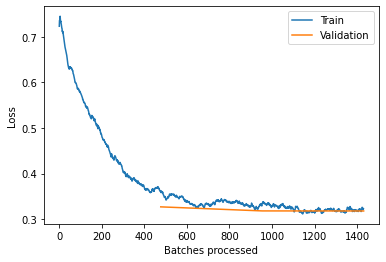

In [102]:
learn.recorder.plot_losses()

summary属性をみると，学習器は，埋め込み層に続いて2つの線形層を配置したニューラルネットになっていることが確認できる．

In [103]:
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (30561 items)
x: TabularList
workclass  Private; education  Assoc-acdm; marital-status  Married-civ-spouse; occupation #na#; relationship  Wife; race  White; sex  Female; native-country  United-States; education-num_na False; age 0.7598; fnlwgt -0.8371; education-num 0.7539; capital-gain -0.1459; capital-loss 4.5067; hours-per-week -0.0358; ,workclass  Private; education  Masters; marital-status  Divorced; occupation  Exec-managerial; relationship  Not-in-family; race  White; sex  Male; native-country  United-States; education-num_na False; age 0.3937; fnlwgt 0.4449; education-num 1.5376; capital-gain 1.2670; capital-loss -0.2168; hours-per-week 0.3682; ,workclass  Private; education  HS-grad; marital-status  Divorced; occupation #na#; relationship  Unmarried; race  Black; sex  Female; native-country  United-States; education-num_na True; age -0.0457; fnlwgt -0.8857; education-num -0.0297; capital-gain -0.1

### 問題

Bostonの住宅価格の予測を深層学習を用いて行え．

medvが住宅の価格で，他のデータ（犯罪率や人口などの数値データ）から予測する．

ただし，訓練データとテストデータのインデックス（**train_idx**,**valid_idx**）を生成するには，
以下に示すように，scikit-learnの**train_test_split**を用いよ．

なお，評価尺度(metrics)には**r2_score**（決定係数）を用いよ．

In [104]:
boston = pd.read_csv('http://logopt.com/data/Boston.csv',index_col=0)
boston.head()

crim    zn  indus  chas    nox  ...  tax  ptratio   black  lstat  medv
1  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
2  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
3  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
4  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
5  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [3]:
from sklearn.model_selection import train_test_split 

procs = [FillMissing, Normalize] #前処理の種類を準備．
train_idx, valid_idx = train_test_split(range(len(boston)), test_size=0.3) #検証用データのインデックスを準備．
dep_var = 'medv' #従属変数名とカテゴリー変数が格納されている列リストを準備．
cont_names = boston.columns
cat_names = []

NameError: ignored

In [0]:
data = TabularDataBunch.from_df(
    'http://logopt.com/data/Boston.csv',
    boston,
    dep_var,
    valid_idx,
    procs,
    cat_names,
    cont_names
    )

In [0]:
learn = tabular_learner(data, layers=[200,200], metrics=r2_score)

In [108]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02
Min loss divided by 10: 9.12E-02


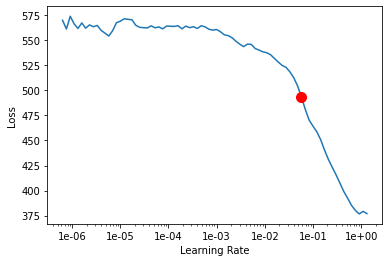

In [54]:
learn.recorder.plot(suggestion=True)

In [55]:
learn.fit_one_cycle(5,1e-1)

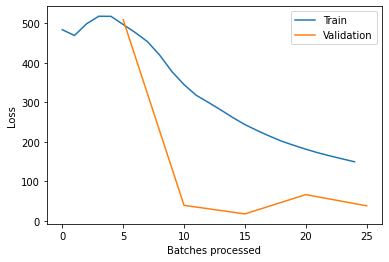

In [56]:
learn.recorder.plot_losses()


### 問題

メールがスパム（spam；迷惑メイル）か否かを，深層学習を用いて判定せよ．

データは，様々な数値情報から，**is_spam**列が1 （スパム）か，0（スパムでない）かを判定するデータである．

評価尺度はaccuracyとする．


In [127]:
import pandas as pd
spam = pd.read_csv("http://logopt.com/data/spam.csv")
spam.head()

word_freq_make  word_freq_address  ...  capital_run_length_total  is_spam
0            0.21               0.28  ...                      1028        1
1            0.06               0.00  ...                      2259        1
2            0.00               0.00  ...                       191        1
3            0.00               0.00  ...                       191        1
4            0.00               0.00  ...                        54        1

[5 rows x 58 columns]

In [0]:
procs = [FillMissing, Categorify, Normalize]
valid_idx = range(int(len(spam)*0.7),len(spam))
dep_var = "is_spam"
cat_names = []
cont_names = spam.drop("is_spam",axis=1).columns

In [0]:
data = TabularDataBunch.from_df(
    'http://logopt.com/data/spam.csv',
    spam,
    dep_var,
    valid_idx,
    procs,
    cat_names,
    cont_names
)

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [131]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.02E-03
Min loss divided by 10: 7.59E-02


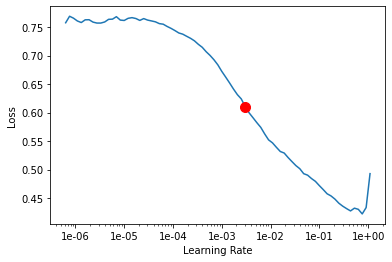

In [132]:
learn.recorder.plot(suggestion=True)

In [133]:
learn.fit_one_cycle(1,1e-3)

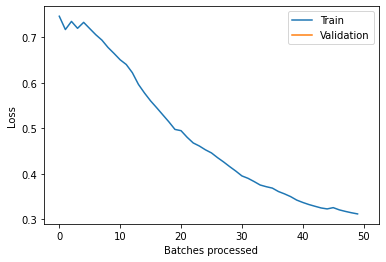

In [134]:
learn.recorder.plot_losses()

### 問題

データから毒キノコか否かを，深層学習を用いて判定せよ．

**target**列がターゲット（従属変数）であり，**edible**が食用，**poisonous**が毒である．

評価尺度はaccuracyとする．


In [135]:
mashroom = pd.read_csv("http://logopt.com/data/mashroom.csv", dtype = {"shape":"category", "surface":"category", "color":"category"})
mashroom.head()

target   shape surface   color
0     edible  convex  smooth  yellow
1     edible    bell  smooth   white
2  poisonous  convex   scaly   white
3     edible  convex  smooth    gray
4     edible  convex   scaly  yellow

In [0]:
procs = [FillMissing, Categorify, Normalize]
valid_idx = range(int(len(mashroom)*0.7), len(mashroom))
dep_var = "target"
cat_names = mashroom.columns
cont_names = []

In [0]:
data = TabularDataBunch.from_df(
    "http://logopt.com/data/mashroom.csv",
    mashroom,
    dep_var,
    valid_idx,
    procs,
    cat_names
    )

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [141]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.00E-03
Min loss divided by 10: 9.12E-02


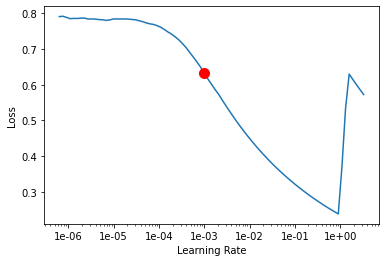

In [143]:
learn.recorder.plot(suggestion=True)

In [144]:
learn.fit_one_cycle(3,1e-3)

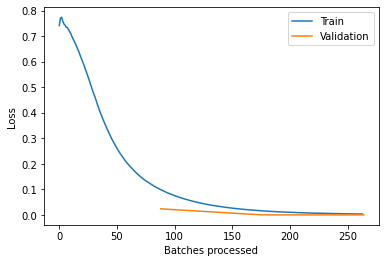

In [145]:
learn.recorder.plot_losses()

### 問題

titanicデータに対して深層学習を行い，死亡確率の推定を行え．


In [6]:
titanic = pd.read_csv("http://logopt.com/data/titanic.csv")
titanic.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [0]:
train_idx, valid_idx = train_test_split(range(len(titanic)), test_size=0.2) #検証用データのインデックスを準備．
dep_var = "Survived" #従属変数名
cat_names = ["Pclass","Sex","SibSp","Parch","Cabin","Embarked"] #カテゴリー変数が格納されている列リスト．
cont_names = ["Age","Fare"] #連続変数名
procs = [FillMissing, Categorify, Normalize] #前処理の種類を準備．

In [0]:
data = TabularDataBunch.from_df(
    "http://logopt.com/data/titanic.csv",
    titanic,
    dep_var,
    valid_idx,
    procs,
    cat_names,
    cont_names
)

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.45E-01
Min loss divided by 10: 3.63E-02


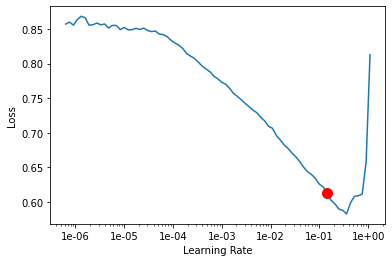

In [14]:
learn.recorder.plot(suggestion=True)

In [15]:
learn.fit_one_cycle(3,1e-1)

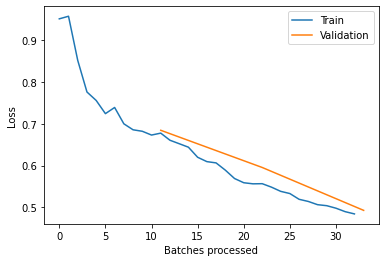

In [16]:
learn.recorder.plot_losses()

### 問題
 "http://logopt.com/data/cancer.csv" にある胸部癌か否かを判定するデータセットを用いて，深層学習による分類を行え．

最初の列**diagnosis**が癌か否かを表すものであり，'M'が悪性（malignant），'B'が良性（benign）を表す．

In [0]:
cancer = pd.read_csv("http://logopt.com/data/cancer.csv", index_col=0)
cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean           ...             \
id                                                     ...              
842302                0.14710         0.2419           ...              
842517                0.07017         0.1812           ...              
84300903              0.12790         0.2069           ...              
84348301              0.10520         0.2597           ...              
84358402              0.10430         0.1809           ...              

          radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                   
842302           25.38          17.33           184.60      2019.0   
842517           24.99          23.41           158.80      1956.0   
84300903         23.57          25.53           152.50      1709.0   
84348301         14.91          26.50            98.87       567.7   
84358402         22.54          16.67           152.20      1575.0   

          smoothness_worst  compactness_worst  concavity_worst  \
id                                                               
842302              0.1622             0.6656           0.7119   
842517              0.1238             0.1866           0.2416   
84300903            0.1444             0.4245           0.4504   
84348301            0.2098             0.8663           0.6869   
84358402            0.1374             0.2050           0.4000   

          concave points_worst  symmetry_worst  fractal_dimension_worst  
id                                                                       
842302                  0.2654          0.4601                  0.11890  
842517                  0.1860          0.2750                  0.08902  
84300903                0.2430          0.3613                  0.08758  
84348301                0.2575          0.6638                  0.17300  
84358402                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### 問題

以下の部屋が使われているか否かを判定するデータに対して，深層学習による分類を行え．

**occupancy**列が部屋が使われているか否かを表す情報であり，これを**datetime**列以外の情報から分類せよ．



In [0]:
occupancy = pd.read_csv("http://logopt.com/data/occupancy.csv")
occupancy.head()

datetime  temperature  ...  humidity  occupancy
0  2015-02-04 17:51:00        23.18  ...  0.004793          1
1  2015-02-04 17:51:59        23.15  ...  0.004783          1
2  2015-02-04 17:53:00        23.15  ...  0.004779          1
3  2015-02-04 17:54:00        23.15  ...  0.004772          1
4  2015-02-04 17:55:00        23.10  ...  0.004757          1

[5 rows x 7 columns]

# 画像データ

In [0]:
from fastai.vision import *

## 衛星画像から複数のラベルを生成する問題


PLANET_TYNYデータを読み込み，画像をデータ増大(data augmentation)を用いて水増ししておく．

In [0]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(label_delim=' ')
        .transform(planet_tfms, size=128)
        .databunch()
        .normalize(imagenet_stats))

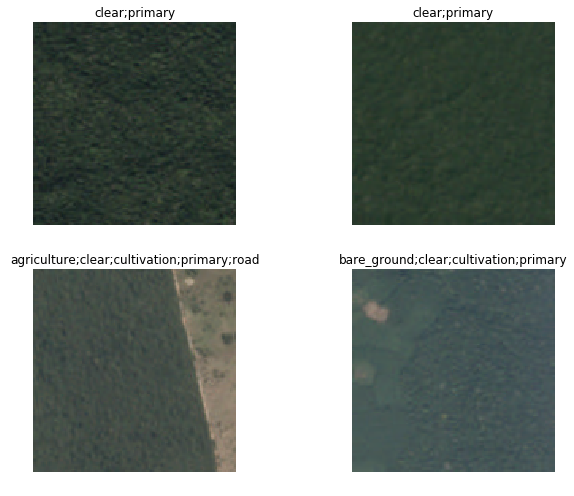

In [0]:
data.show_batch(rows=2, figsize=(9,7))

In [0]:
learn = cnn_learner(data, models.resnet18)
learn.fit_one_cycle(5,1e-2)

結果の表示

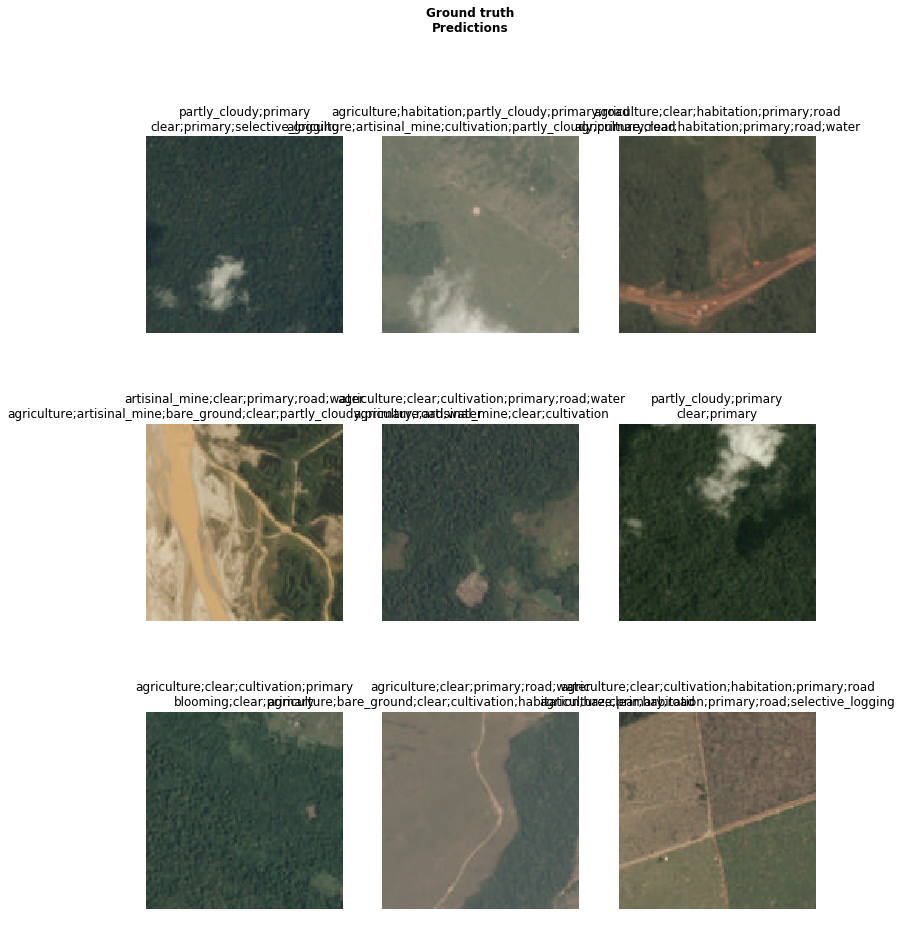

In [0]:
learn.show_results(rows=3, figsize=(12,15))

## 画像から人の頭の中心を当てる回帰

データを読み込み，サンプル画像を表示

In [0]:
biwi = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = pickle.load(open(biwi/'centers.pkl', 'rb'))

In [0]:
data = (PointsItemList.from_folder(biwi)
        .split_by_rand_pct(seed=42)
        .label_from_func(lambda o:fn2ctr[o.name])
        .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch()
        .normalize(imagenet_stats))

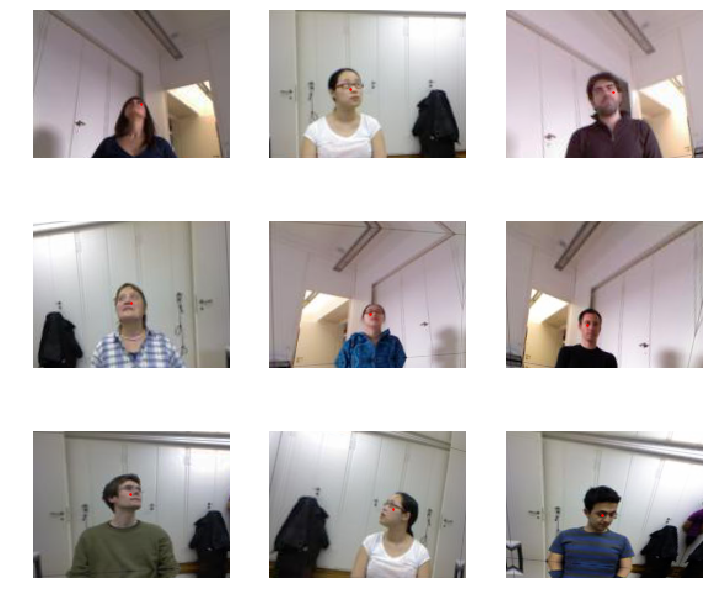

In [0]:
data.show_batch(rows=3, figsize=(10,9))

In [0]:
learn = cnn_learner(data, models.resnet18, lin_ftrs=[100], ps=0.05)
learn.fit_one_cycle(15, 5e-2)

正解と予測を表示

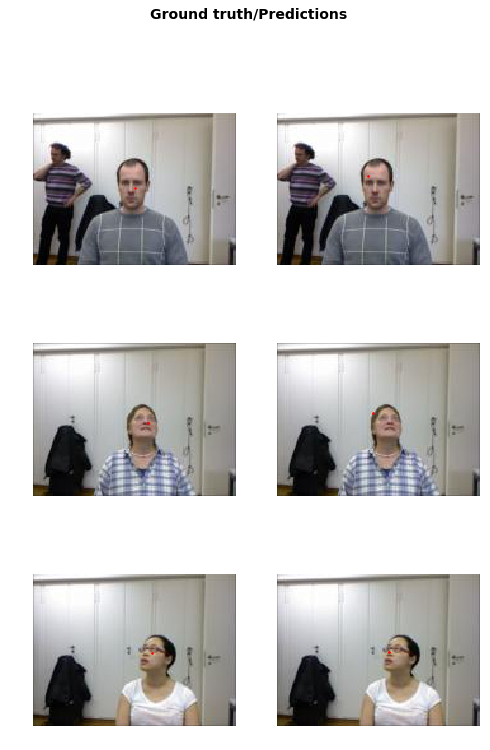

In [0]:
learn.show_results(rows=3)

# 協調フィルタリング

In [0]:
from fastai.collab import * 

協調フィルタリング(collaborative filtering)とは，推奨システム(recommender system)の一種で，ユーザーとアイテムの両方の潜在因子を考慮して，レーティングを決める手法だ．

推奨システムでよく見かけるのは，「この商品を買った人はこの商品も買っています」とか「最も良く売れているのはこの商品です」などの猿でもできるタイプのものだ．このような単純なものではなく，あなたに似た潜在因子をもつ人が，高いレーティングをつけている（もしくは良く購入する）商品に近い潜在因子をもった商品を紹介するのが，協調フィルタリングである．

機械学習の中で（Andrew Ngが実務家から聞いた話だが）実務で最も役に立つ，もしくは期待されているのがこれだ．

有名な例題（映画の評価値を当てる）であるMovieLensのデータを読み込む．

データにはtimestamp列がついているが，とりあえずこれは無視してレーティング(rating)を予測してみる．

In [0]:
path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

userId  movieId  rating   timestamp
0      73     1097     4.0  1255504951
1     561      924     3.5  1172695223
2     157      260     3.5  1291598691
3     358     1210     5.0   957481884
4     130      316     2.0  1138999234

CollabDataBunchクラスのfrom_dfメソッドにデータフレームを入れるとデータオブジェクトを作成してくれる．

引数はデータフレーム(ratings)，検証データの比率(pct_val)，ユーザー，アイテム，レーティングを表す列名だ．

In [0]:
data = CollabDataBunch.from_df(ratings)

作成したデータオブジェクトをcollab_learner関数に入れると学習器（誤差を最小にする潜在因子行列の重みの最適化が目的）を作ってくれる．予測したいレーティングは，星５つまでなので，y_rangeで指定する．

データオブジェクト(data)，潜在因子の数(n_factors)を指定しているが，他にもmetricsは評価尺度，wdはweight decayで正則化のためのパラメータなどを指定できる．

```
def collab_learner(data, n_factors:int=None, use_nn:bool=False, metrics=None,
                  emb_szs:Dict[str,int]=None, wd:float=0.01, **kwargs)->Learner
 ```

In [0]:
learn = collab_learner(data, n_factors=50, y_range=(0.,5.))

In [0]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

# 意味分割(semantic segmentation)

以下のデータセットは、与えられた画像の分割（各ピクセルがどの物体に属するのかを分類すること）に用いられる。


- Camvid: Motion-based Segmentation and Recognition Dataset (CAMVID, CAMVID_TINY)

In [0]:
camvid = untar_data(URLs.CAMVID)
path_lbl = camvid/'labels'
path_img = camvid/'images'

In [0]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str)
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [0]:
data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), tfm_y=True, size=128)
        .databunch(bs=16, path=camvid)
        .normalize(imagenet_stats))

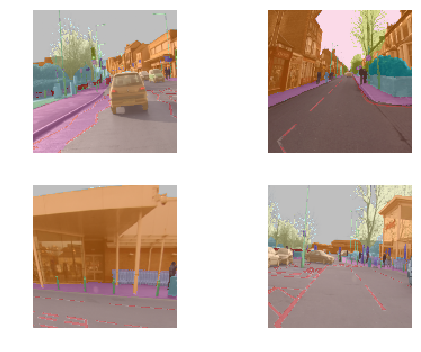

In [0]:
data.show_batch(rows=2, figsize=(7,5))

In [0]:
learn = unet_learner(data, models.resnet18)
learn.fit_one_cycle(3,1e-2)
learn.save('mini_train')

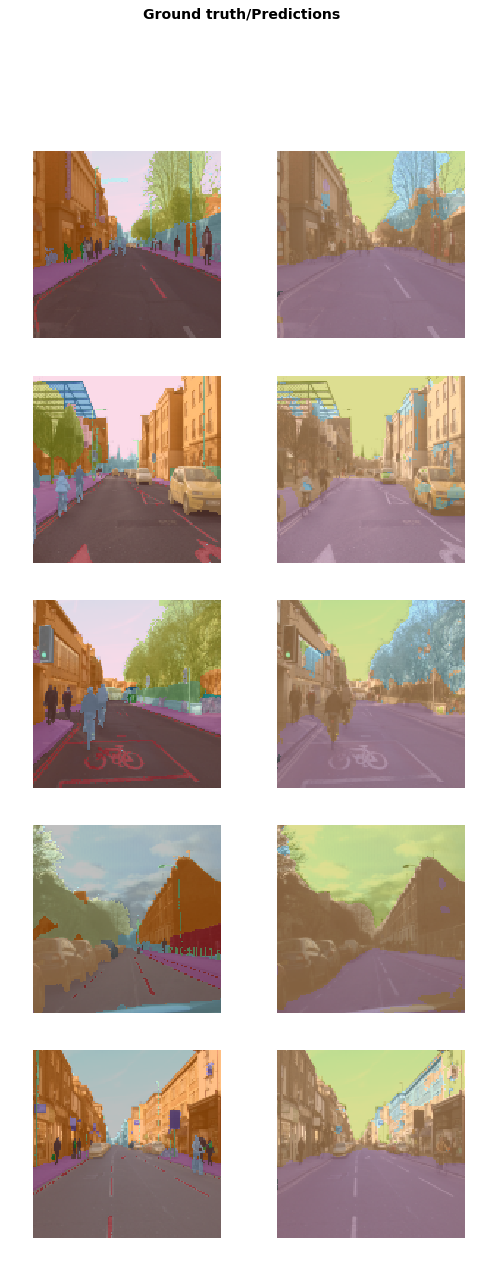

In [0]:
learn.show_results()

# テキストデータ

文章を解釈する学習器を作る．文章を与えたとき，その後に続く文を予測する訓練を行うことによって，単語を数値で表すエンコーディングを行う．

In [0]:
from fastai.text import *

In [0]:
imdb = untar_data(URLs.IMDB_SAMPLE)

In [0]:
data_lm = (TextList.from_csv(imdb, 'texts.csv', cols='text')
                   .split_by_rand_pct()
                   .label_for_lm()
                   .databunch())
data_lm.save()

In [0]:
data_lm.show_batch()

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM)
learn.fit_one_cycle(2, 1e-2)
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')

In [0]:
learn.show_results()

## 分類

上で作成したエンコーダー（単語を数値にエンコードしたもの）を用いて，映画の批評がネガティブかパシティブかを予測する．


In [0]:
data_clas = (TextList.from_csv(imdb, 'texts.csv', cols='text', vocab=data_lm.vocab)
                   .split_from_df(col='is_valid')
                   .label_from_df(cols='label')
                   .databunch(bs=42))

In [0]:
data_clas.show_batch()

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM)
learn.load_encoder('mini_train_encoder')
learn.fit_one_cycle(2, slice(1e-3,1e-2))
learn.save('mini_train_clas')

In [0]:
learn.show_results()

# 敵対的生成ネットワーク GAN (Genera tive Adversarial Networks) による画像生成


In [0]:
from fastai.vision import *
from fastai.vision.gan import *

寝室の画像データ LSUN を読み込み，ノイズを加え，データ増大，正規化を行う．

In [0]:
path = untar_data(URLs.LSUN_BEDROOMS)

In [0]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

In [0]:
data = get_data(128, 64)

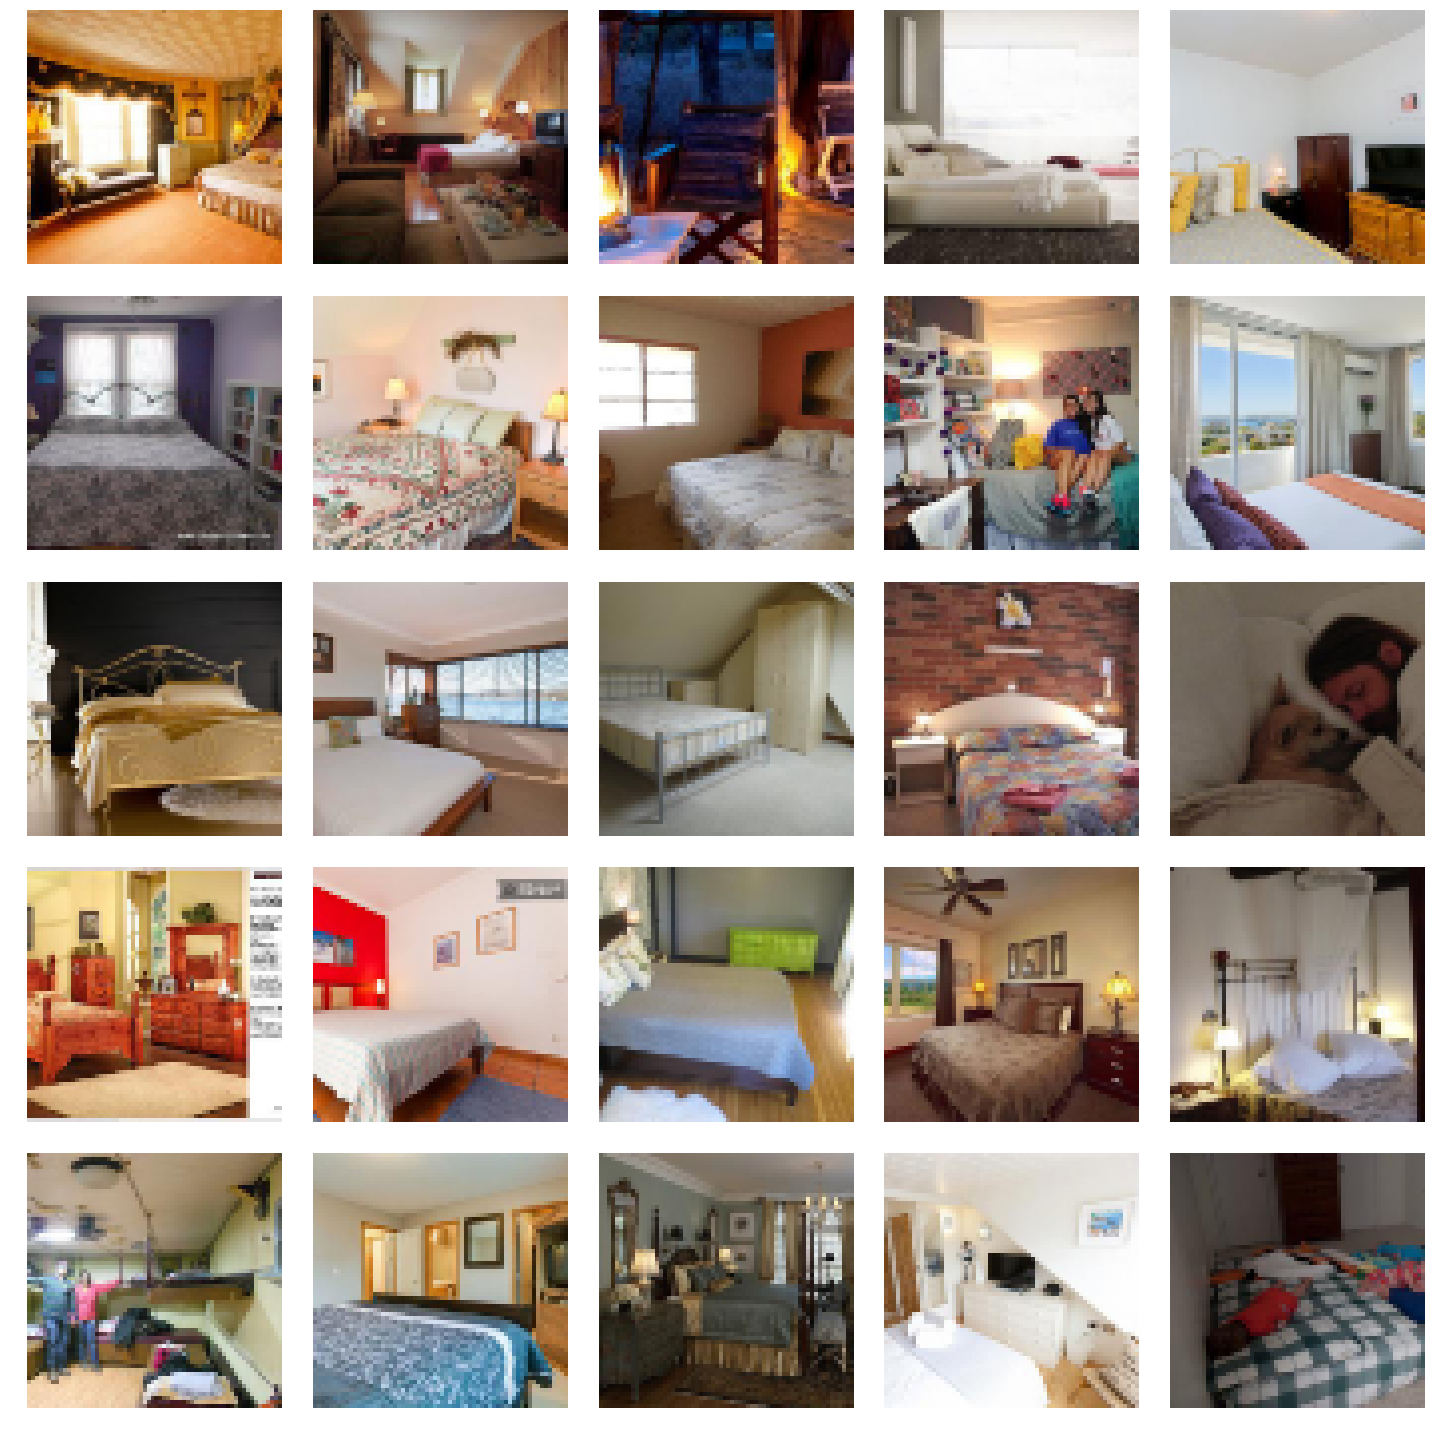

In [0]:
data.show_batch(rows=5)

GANは生成ネットワーク（generator）と識別ネットワーク（critic）の2つのネットワークから構成される。

生成ネットワークが寝室の画像を出力し、識別ネットワークがそれが本物の画像なのか生成されたフェイク画像なのかを判定する。

生成側は識別側を欺こうと学習し、識別側はより正確に識別しようと学習する。

このように2つのネットワークが相反した目的のもとに学習する様が敵対的と呼ばれるゆえんである．

`generator`と`critic`のインスタンスを生成し，それを敵対的学習器`gan_learner`に入れて交互に学習させる．

損出関数は当てにならないので，エポックごとに生成された画像が段々本物に近づいていることを確認する．


In [0]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [0]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0.)

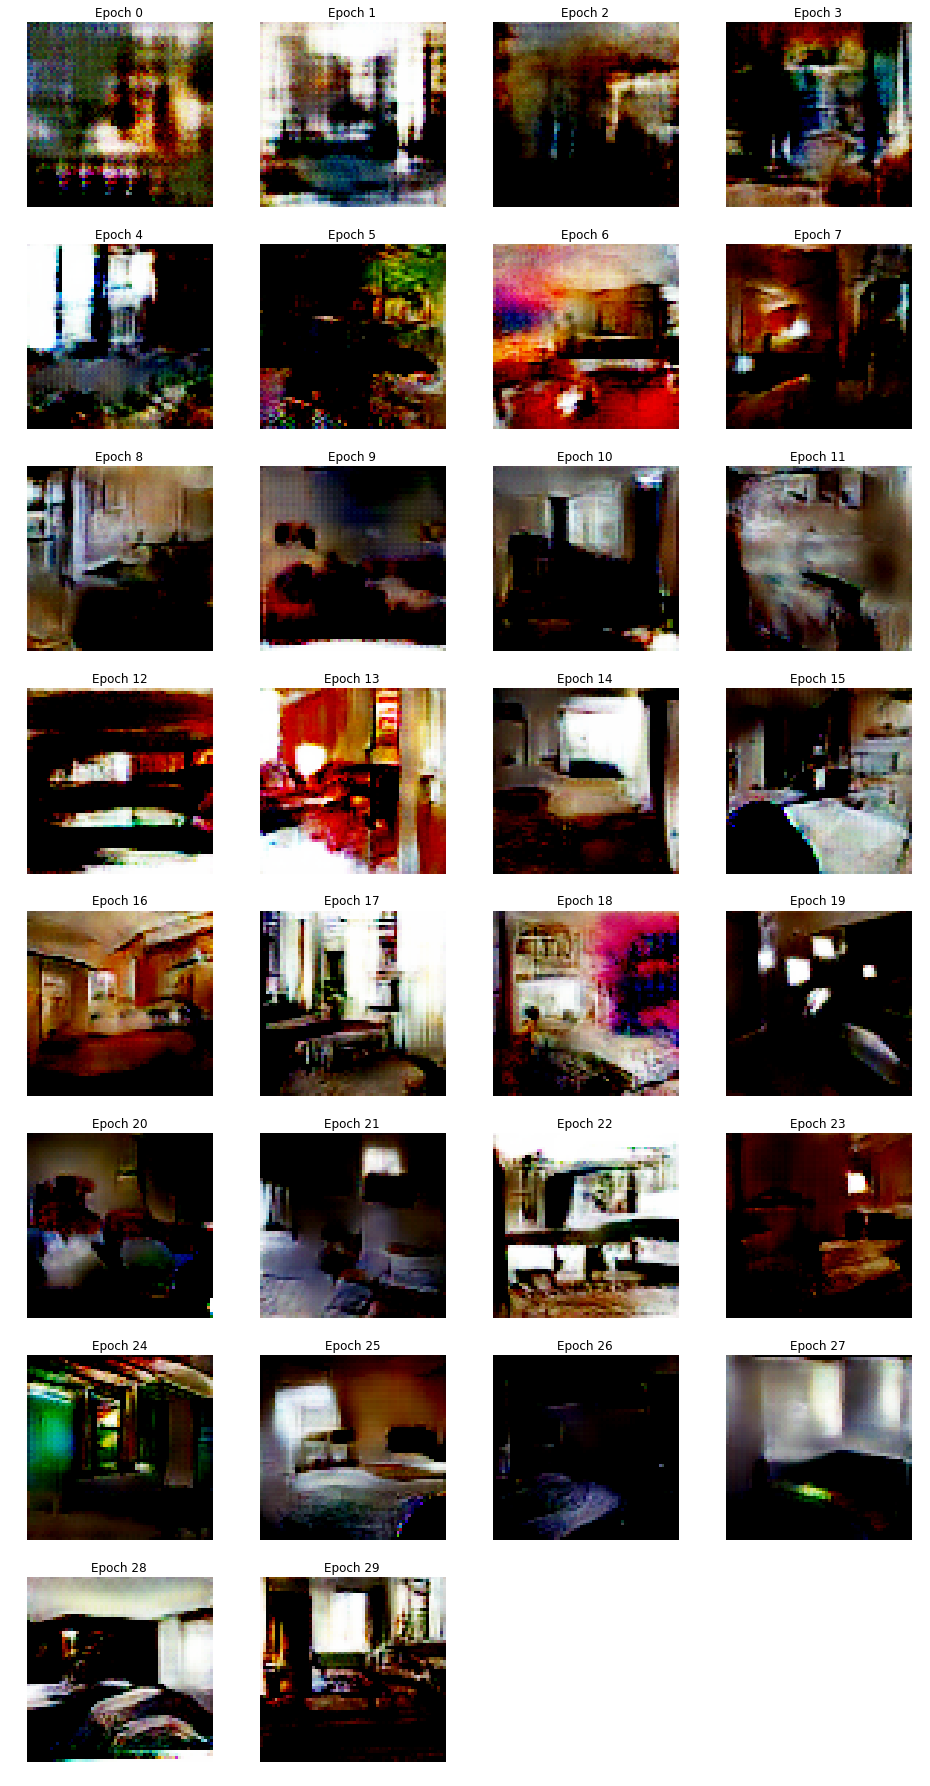

In [0]:
learn.fit(30,2e-4)

訓練済みの生成ネットワークを用いてフェイク画像を生成してみる．

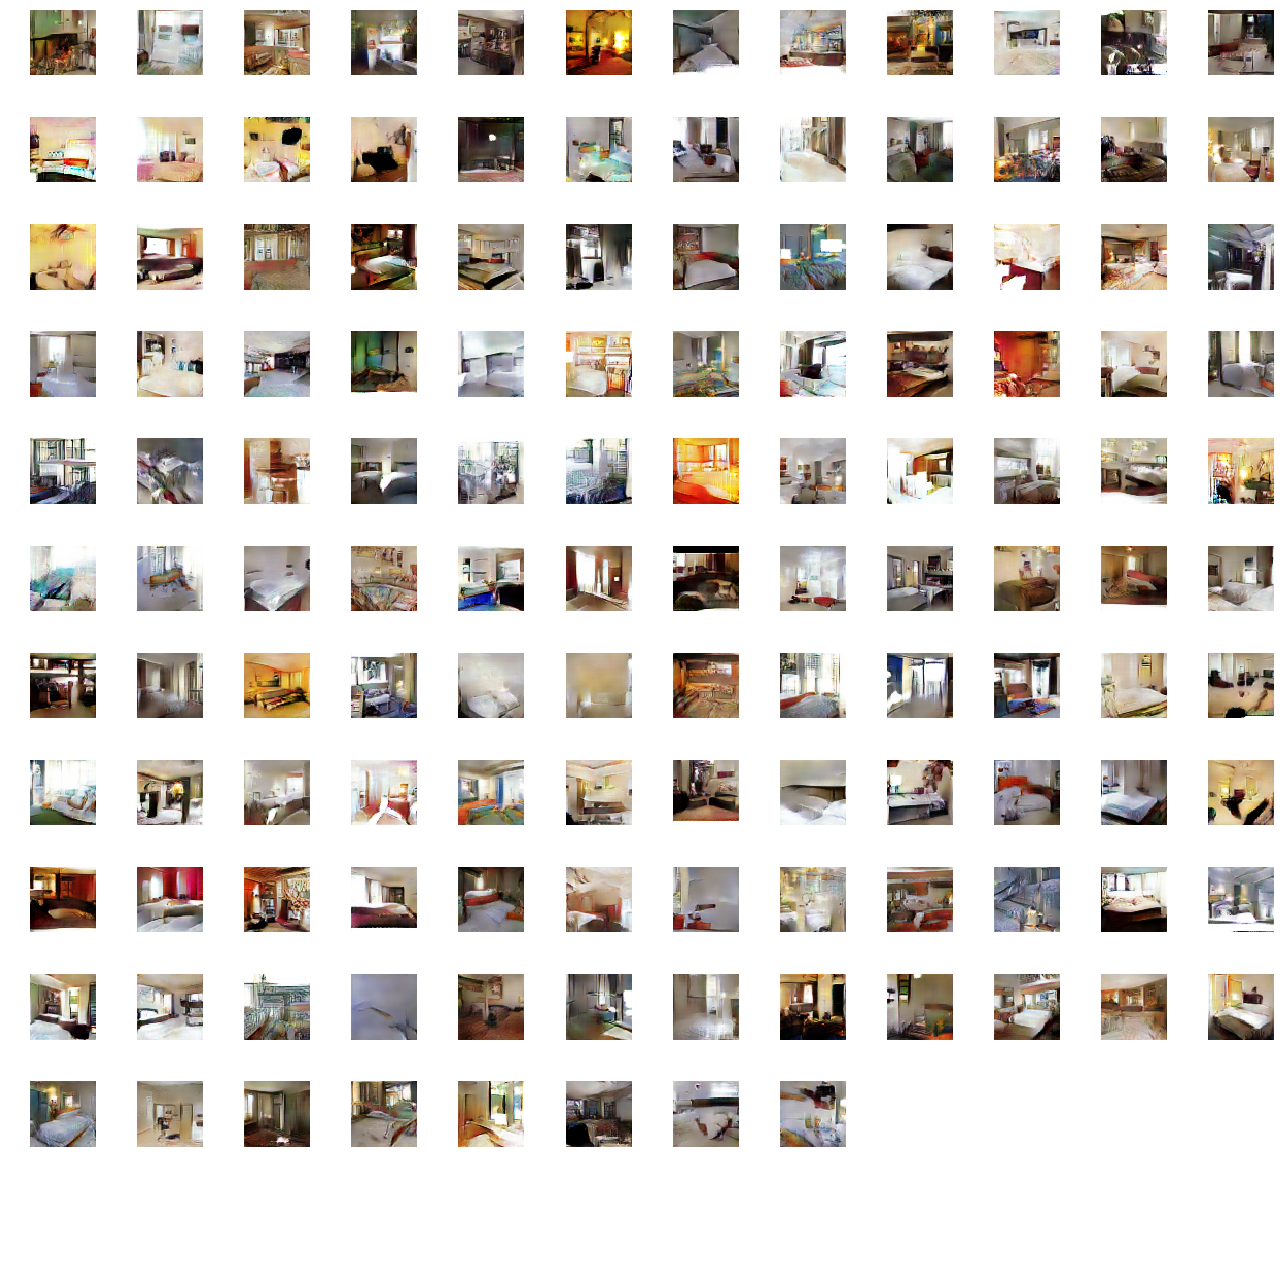

In [0]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=16, figsize=(18,18))